<a href="https://colab.research.google.com/github/markvasin/Kaggle-Quora-Insincere-Questions-Classification/blob/master/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quora Insincere Questions Classification

https://www.kaggle.com/c/quora-insincere-questions-classification

###Packages

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Data Exploration

##Loading Data

In [5]:
# from google.colab import files
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_path = '/content/drive/My Drive/Colab Notebooks/Advanced Machine Learning/Data/train.csv'
test_path = '/content/drive/My Drive/Colab Notebooks/Advanced Machine Learning/Data/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [7]:
print('Train shape : ', train_df.shape)
print('Test shape : ', test_df.shape)

Train shape :  (1306122, 3)
Test shape :  (375806, 2)


In [8]:
"""
qid - unique question identifier
question_text - Quora question text
target - a question labeled "insincere" has a value of 1, otherwise 0
"""
# pd.set_option('display.max_columns', None)  
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
train_df.sample(10)


,qid,question_text,target
1242832,f38ea9bcc7dc4ca4f3f0,Why is the magical community in Harry Potter r...,0
48044,096a6358ceaa7db2604a,How can I assemble a dog crate?,0
353543,454b067c40f50f96aa51,If large companies have a hard time innovating...,0
707863,8a99173f70e88941177e,Why is the letter 'X' popular?,0
266328,34201708243841ef7bdd,Why is it to hard to find my veins?,0
447153,5796e145924b921ecd5a,Which business product has the best requiremen...,0
317234,3e2c72df517d053fd538,What do I do when my Torrent stops downloading?,0
1237825,f293b9910367c5f7f547,How can you lose someone you love & still be o...,0
812386,9f2bd8d78978ba4a376d,Are the Slavic word ''čaj'' and the Hindi word...,0
1240702,f3240ce3165efb03e2ad,What will happen if a person travels at the sp...,0


##Target Distribution##

0 = Sincere Question

1 = Insincere Question

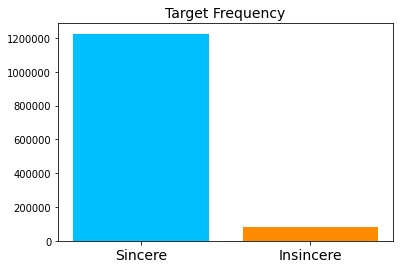

In [9]:
target_count = train_df['target'].value_counts()
targets = ['Sincere', 'Insincere']
plt.title('Target Frequency', fontsize=14)
plt.ticklabel_format(style='plain')
plt.xticks(fontsize=14)
plt.bar(target_count.index, target_count.values, tick_label=targets, color = ['deepskyblue','darkorange'])
plt.show()

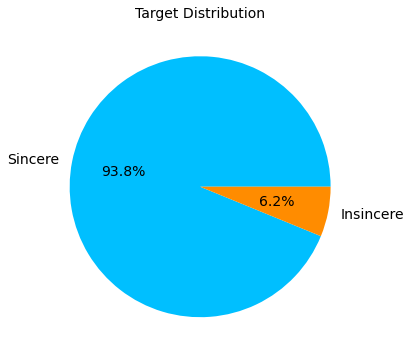

In [10]:
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.title('Target Distribution', fontsize=14)
plt.pie(target_count.values, labels=targets, autopct='%1.1f%%', colors=['deepskyblue','darkorange'], textprops={'fontsize': 14})
plt.show()

##N Grams Visualisation

In [11]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
from wordcloud import WordCloud, STOPWORDS

from collections import Counter
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
insincere_df = train_df[train_df['target']==1]
sincere_df = train_df[train_df['target']==0]

def get_ngram_df(texts, n=1):
  frequency = defaultdict(int)

  for text in texts:
    tokenized = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    n_grams = ngrams(tokenized, n)
    for words in n_grams:
      filter(None, words)
      words = ' '.join(words)
      frequency[words] += 1
      
  df = pd.DataFrame(sorted(frequency.items(), key=lambda x: x[1])[::-1])
  df.columns = ['word', 'wordcount']
  return df


def comparison_plot(sincer_df, insincer_df, col_1, col_2, space, n):
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    
    chart1 = sns.barplot(x=col_1, y=col_2, data=sincer_df, ax=ax[0], color="deepskyblue")
    chart2 = sns.barplot(x=col_1, y=col_2, data=insincer_df, ax=ax[1], color="darkorange")

    ax[0].set_ylabel('Word count', size=14)
    ax[0].set_xlabel('Words', size=14)
    ax[0].set_title(f'Top {n} Words in Sincere Questions', size=14)

    ax[1].set_ylabel('Word count', size=14)
    ax[1].set_xlabel('Words', size=14)
    ax[1].set_title(f'Top {n} Words in Insincere Questions', size=14)

    chart1.set_xticklabels(
    chart1.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
    fig.subplots_adjust(wspace=space)

    chart2.set_xticklabels(
    chart2.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
    fig.subplots_adjust(wspace=space)
    
    plt.show()

####Unigram (Bag of Words)

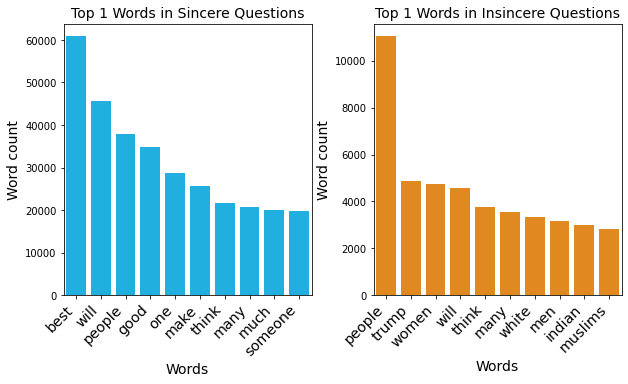

In [13]:
insincere_unigram_df = get_ngram_df(insincere_df['question_text'])
sincere_unigram_df = get_ngram_df(sincere_df['question_text'])

comparison_plot(sincere_unigram_df.head(10), insincere_unigram_df.head(10), 'word', 'wordcount', 0.25, 1)


####Bigram

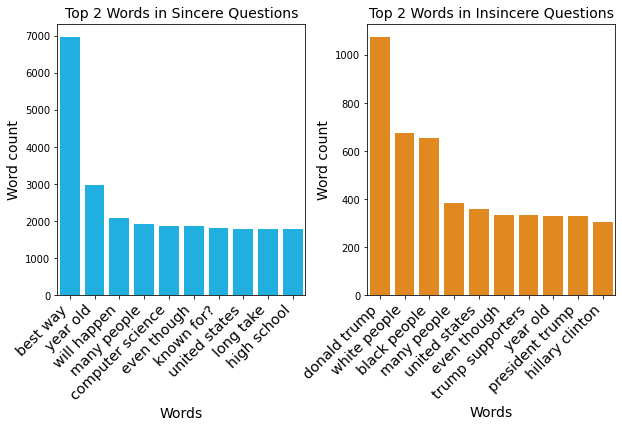

In [14]:
insincere_bigram_df = get_ngram_df(insincere_df['question_text'], 2)
sincere_bigram_df = get_ngram_df(sincere_df['question_text'], 2)

comparison_plot(sincere_bigram_df.head(10), insincere_bigram_df.head(10), 'word', 'wordcount', 0.25, 2)


####Trigram


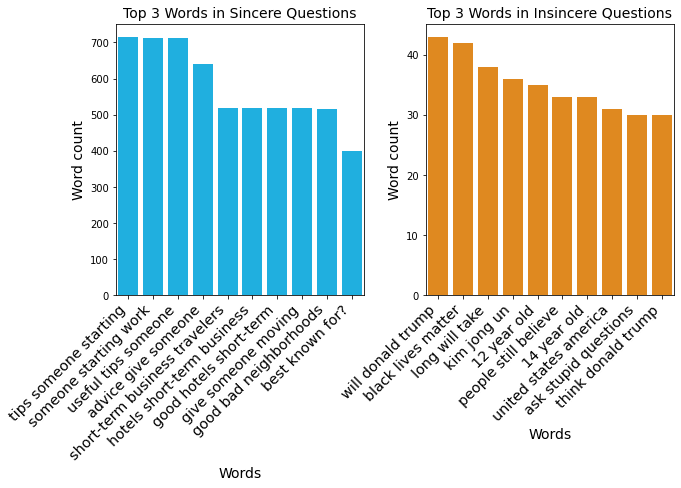

In [15]:
insincere_trigram_df = get_ngram_df(insincere_df['question_text'], 3)
sincere_trigram_df = get_ngram_df(sincere_df['question_text'], 3)

comparison_plot(sincere_trigram_df.head(10), insincere_trigram_df.head(10), 'word', 'wordcount', 0.25, 3)

##Word Cloud

####All Questions

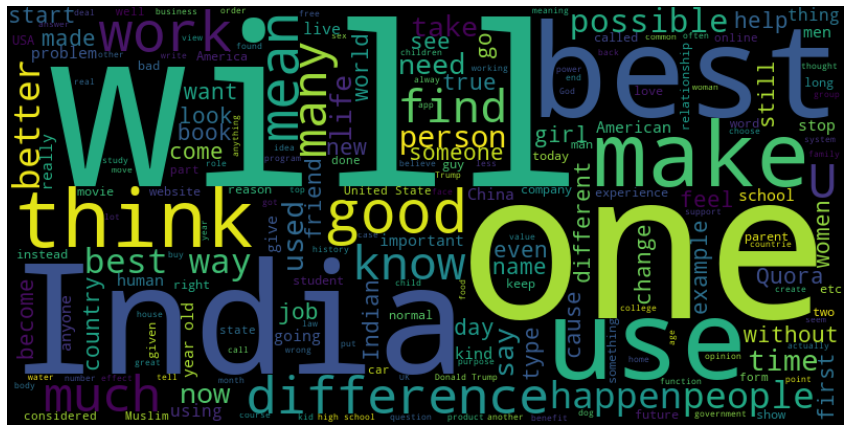

In [16]:
combined_text = train_df['question_text'].str.cat(sep=' ')
wordcloud = WordCloud(background_color='black', width=800, height=400, stopwords = set(STOPWORDS))
wordcloud.generate(combined_text)

# Display the generated image:
plt.figure(figsize=(15.0, 10.0))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

####Sincere Questions

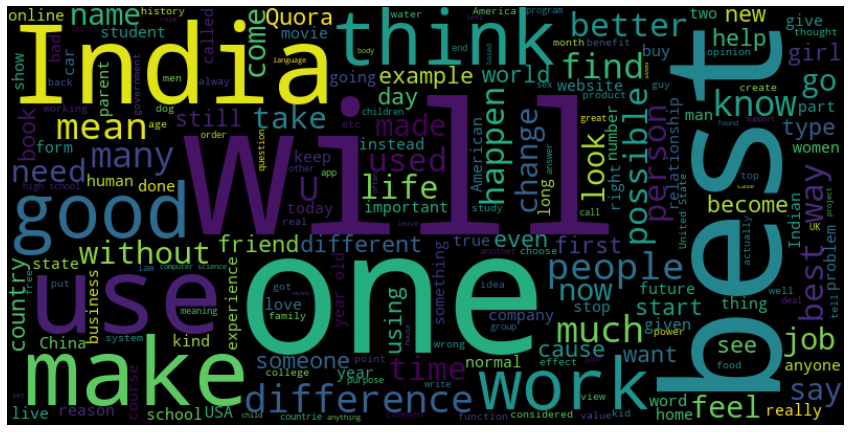

In [17]:
combined_text = sincere_df['question_text'].str.cat(sep=' ')
wordcloud = WordCloud(background_color='black', width=800, height=400, stopwords = set(STOPWORDS))
wordcloud.generate(combined_text)

# Display the generated image:
plt.figure(figsize=(15.0, 10.0))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

####Insincere Questions

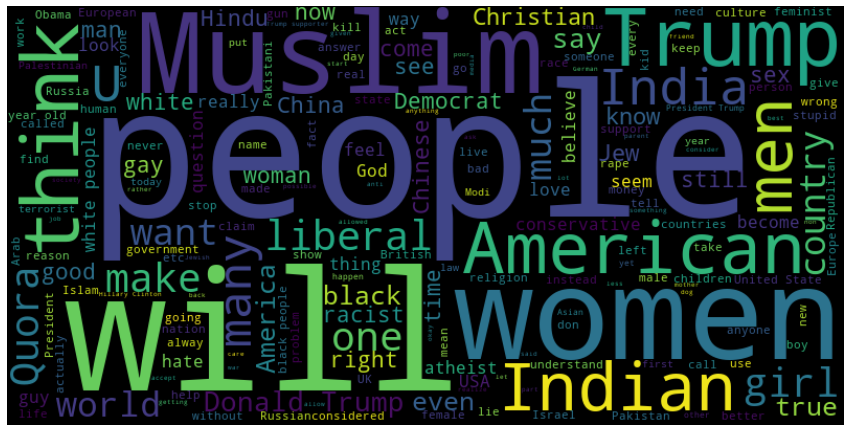

In [18]:
combined_text = insincere_df['question_text'].str.cat(sep=' ')
wordcloud = WordCloud(background_color='black', width=800, height=400, stopwords = set(STOPWORDS))
wordcloud.generate(combined_text)

# Display the generated image:
plt.figure(figsize=(15.0, 10.0))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Meta Features Exploration##
1. Number of words in the text
2. Number of unique words in the text
3. Number of characters in the text
4. Number of stopwords
5. Number of punctuations
6. Number of upper case words
7. Average length of the words

In [0]:
## Number of words in the text ##
train_df["num_words"] = train_df["question_text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
train_df["num_unique_words"] = train_df["question_text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
train_df["num_chars"] = train_df["question_text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
train_df["num_stopwords"] = train_df["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
train_df["num_punctuations"] =train_df['question_text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of upper case words in the text ##
train_df["num_words_upper"] = train_df["question_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Average length of the words in the text ##
train_df["mean_word_len"] = train_df["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

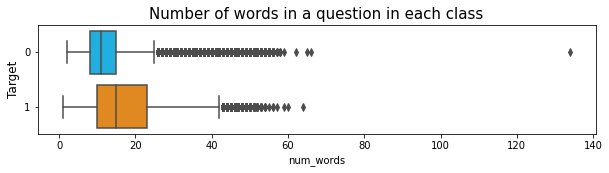

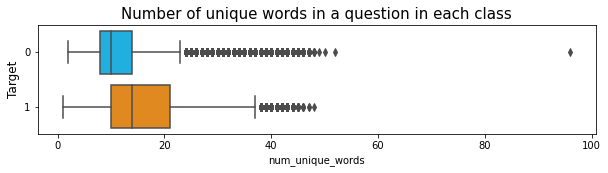

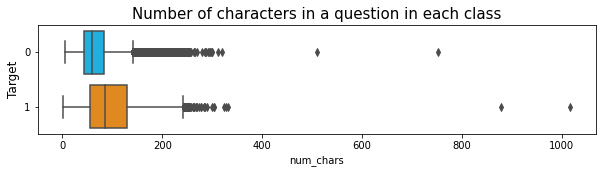

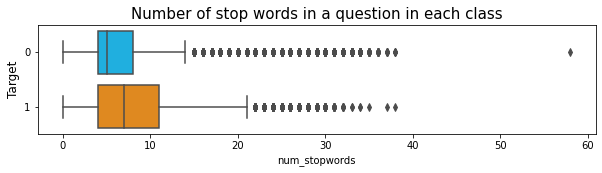

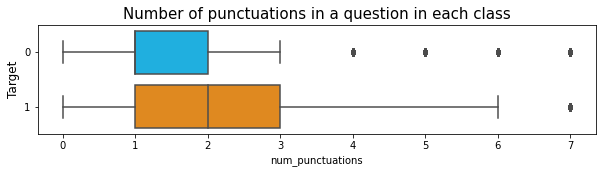

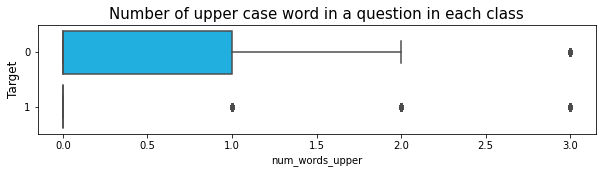

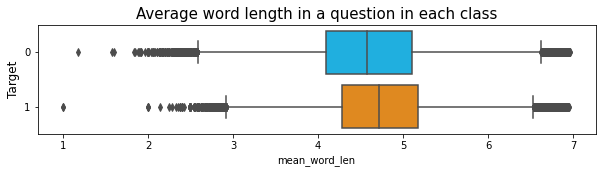

In [20]:
## Number of words in the text ##
fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_words', y='target', data=train_df, orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of words in a question in each class", fontsize=15)

## Number of unique words in the text ##
fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_unique_words', y='target', data=train_df, orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of unique words in a question in each class", fontsize=15)

## Number of characters in the text ##
fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_chars', y='target', data=train_df, orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of characters in a question in each class", fontsize=15)

## Number of stopwords in the text ##
fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_stopwords', y='target', data=train_df, orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of stop words in a question in each class", fontsize=15)

## Number of punctuations in the text ##
fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_punctuations', y='target', data=train_df[train_df['num_punctuations']<train_df['num_punctuations'].quantile(.99)], orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of punctuations in a question in each class", fontsize=15)

## Number of upper case words in the text ##
fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='num_words_upper', y='target', data=train_df[train_df['num_words_upper']<train_df['num_words_upper'].quantile(.99)], orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Number of upper case word in a question in each class", fontsize=15)

## Average length of the words in the text ##
fig, ax = plt.subplots(figsize=(10,2))
ax = sns.boxplot(x='mean_word_len', y='target', data=train_df[train_df['mean_word_len']<train_df['mean_word_len'].quantile(.99)], orient='h', palette=['deepskyblue', 'darkorange'])
ax.set_ylabel('Target', fontsize=12)
ax.set_title("Average word length in a question in each class", fontsize=15)

plt.show()

In [21]:
train_df.head(5)

,qid,question_text,target,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,mean_word_len
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13,13,72,7,1,0,4.615385
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16,15,81,10,2,0,4.125000
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10,8,67,3,2,0,5.800000
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9,9,57,3,1,0,5.444444
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15,15,77,7,1,2,4.200000


#Preprocessing

In [0]:
all_text = list(train_df['question_text'].values)
corpus = [word_tokenize(token) for token in all_text]

In [0]:
lowercase_train = [[token.lower() for token in doc] for doc in corpus]

In [0]:
alphas_text = [[token for token in doc if token.isalpha()] for doc in lowercase_train]

In [0]:
train_df['cleaned_text'] = [' '.join(i) for i in alphas_text]

In [26]:
train_df.head()

,qid,question_text,target,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,num_words_upper,mean_word_len,cleaned_text
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13,13,72,7,1,0,4.615385,how did quebec nationalists see their province...
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16,15,81,10,2,0,4.125000,do you have an adopted dog how would you encou...
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10,8,67,3,2,0,5.800000,why does velocity affect time does velocity af...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9,9,57,3,1,0,5.444444,how did otto von guericke used the magdeburg h...
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15,15,77,7,1,2,4.200000,can i convert montra helicon d to a mountain b...


In [0]:
insincere_text = list(insincere_df['question_text'].values)
insincere_tokens = [word_tokenize(token) for token in insincere_text]
insincere_lowercase = [[token.lower() for token in doc] for doc in insincere_tokens]
insincere_alphas = [[token for token in doc if token.isalpha()] for doc in insincere_lowercase]
insincere_alphas_text = [' '.join(i) for i in insincere_alphas]

#Exploring Different Word Embeddings


In [0]:
import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [0]:
def build_vocab(texts):
    # sentences = texts.apply(lambda x: x.split()).values
    sentences = texts
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [0]:
def check_coverage(vocab, embeddings_index):
    known_words = {}
    unknown_words = {}
    nb_known_words = 0
    nb_unknown_words = 0
    for word in vocab.keys():
        try:
            known_words[word] = embeddings_index[word]
            nb_known_words += vocab[word]
        except:
            unknown_words[word] = vocab[word]
            nb_unknown_words += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(known_words) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(nb_known_words / (nb_known_words + nb_unknown_words)))

In [0]:
vocab = build_vocab(alphas_text)

##Word2Vec

In [32]:
word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [33]:
word2vec_model.most_similar('barcelona')

[('real_madrid', 0.7828749418258667),
 ('barca', 0.7812787294387817),
 ('madrid', 0.7679235935211182),
 ('drogba', 0.7621423602104187),
 ('man_utd', 0.7569426894187927),
 ('messi', 0.7537578344345093),
 ('ronaldinho', 0.7480927109718323),
 ('chelsea', 0.746387243270874),
 ('tottenham', 0.7456821799278259),
 ('liverpool', 0.7438541054725647)]

In [34]:
word2vec_model.most_similar('messi')

[('drogba', 0.8152334094047546),
 ('ronaldo', 0.7879914045333862),
 ('ronaldinho', 0.7759474515914917),
 ('torres', 0.7755779027938843),
 ('pirlo', 0.7746129631996155),
 ('xavi', 0.7720139026641846),
 ('sneijder', 0.7672234177589417),
 ("eto'o", 0.7641000151634216),
 ('barca', 0.7615001201629639),
 ('gerrard', 0.7611674070358276)]

In [35]:
vector = word2vec_model['actor'] - word2vec_model['man'] + word2vec_model['woman']
word2vec_model.similar_by_vector(vector)

[('actress', 0.8763542175292969),
 ('actor', 0.8711175918579102),
 ('actresses', 0.6629499197006226),
 ('thesp', 0.6566717624664307),
 ('Actress', 0.6258443593978882),
 ('actress_Rachel_Weisz', 0.6193411350250244),
 ('actors', 0.5909899473190308),
 ('comedian_Dom_DeLuise', 0.589963972568512),
 ('Actor', 0.5881482362747192),
 ('actress_Claire_Danes', 0.5856903791427612)]

In [36]:
print("Word2Vec : ")
check_coverage(vocab, word2vec_model)

Word2Vec : 
Found embeddings for 42.89% of vocab
Found embeddings for  89.33% of all text


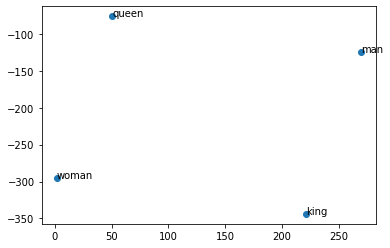

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

words = ['man', 'woman', 'king', 'queen']
words_vector = np.array([word2vec_model[w] for w in words])

Y = tsne.fit_transform(words_vector)
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

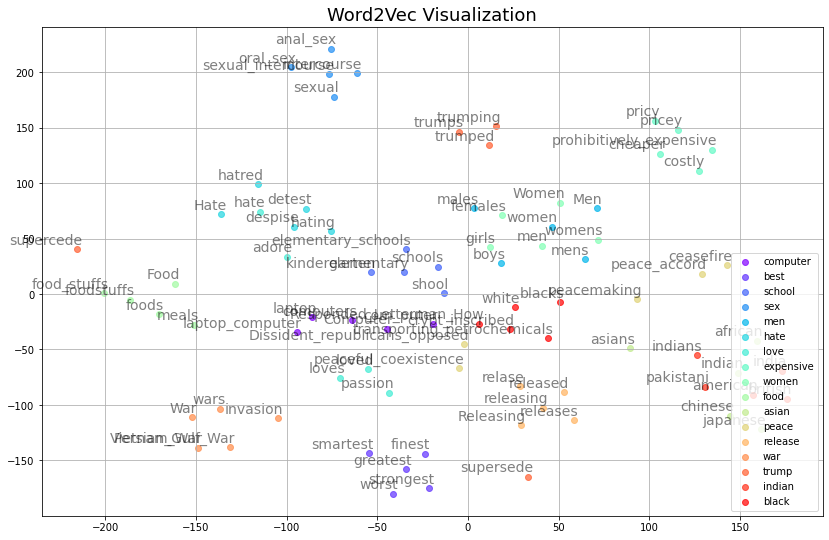

In [80]:
from sklearn.manifold import TSNE

keys = ['computer', 'best', 'school', 'sex', 'men', 'hate', 'love', 'expensive', 'women', 'food', 'asian', 'peace', 'release', 'war', 'trump', 'indian', 'black']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in word2vec_model.most_similar(word, topn=5):
        words.append(similar_word)
        embeddings.append(word2vec_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(14, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=14)
    plt.legend(loc=4)
    plt.title(title, {'fontsize': 18})
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()

tsne_plot_similar_words('Word2Vec Visualization', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

##GLOVE

In [39]:
from os.path import exists
# if not exists('glove.840B.300d.zip'):
!wget -O glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
!unzip glove.840B.300d.zip

--2020-04-27 20:13:32--  http://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.840B.300d.zip [following]
--2020-04-27 20:13:32--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip [following]
--2020-04-27 20:13:32--  http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip

In [40]:
!ls

drive  glove.840B.300d.txt  glove.840B.300d.zip  sample_data  similar_words.png


In [0]:
if not exists('glove.840B.300d.txt.word2vec'):
  glove_input_file = 'glove.840B.300d.txt'
  word2vec_output_file = 'glove.840B.300d.txt.word2vec'
  glove2word2vec(glove_input_file, word2vec_output_file)

glove_model = KeyedVectors.load_word2vec_format('glove.840B.300d.txt.word2vec', binary=False)

In [42]:
glove_model.most_similar('man')

[('woman', 0.7401745319366455),
 ('guy', 0.7067893743515015),
 ('boy', 0.7045701742172241),
 ('he', 0.6831111907958984),
 ('men', 0.6729365587234497),
 ('gentleman', 0.6320432424545288),
 ('dude', 0.6291712522506714),
 ('himself', 0.6282387971878052),
 ('him', 0.6130028367042542),
 ('lad', 0.6001025438308716)]

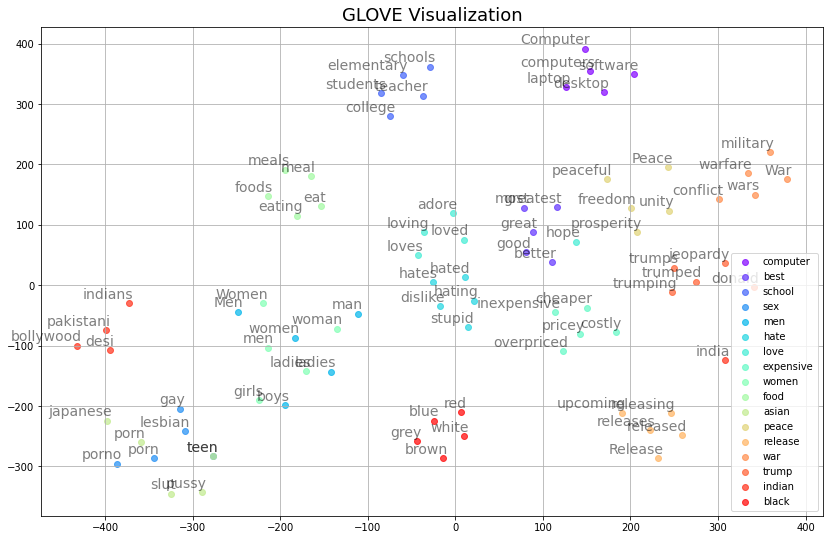

In [81]:
keys = ['computer', 'best', 'school', 'sex', 'men', 'hate', 'love', 'expensive', 'women', 'food', 'asian', 'peace', 'release', 'war', 'trump', 'indian', 'black']
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in glove_model.most_similar(word, topn=5):
        words.append(similar_word)
        embeddings.append(glove_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(14, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=14)
    plt.legend(loc=4)
    plt.title(title, {'fontsize': 18})
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('GLOVE Visualization', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

##FastText


In [43]:
if not exists('wiki-news-300d-1M.vec.zip'):
  !wget -O wiki-news-300d-1M.vec.zip https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
  !unzip wiki-news-300d-1M.vec.zip

--2020-04-27 20:45:38--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 2606:4700:10::6816:4b8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  29.8MB/s    in 22s     

2020-04-27 20:46:01 (29.1 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [0]:
fasttext_model = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec')

In [45]:
fasttext_model.most_similar('thai')

[('Thai', 0.709956169128418),
 ('thailand', 0.662773609161377),
 ('muay', 0.6529220938682556),
 ('farang', 0.6480675935745239),
 ('thais', 0.6478999853134155),
 ('bangkok', 0.6262693405151367),
 ('Isaan', 0.6214834451675415),
 ('siam', 0.614883542060852),
 ('khao', 0.6121606230735779),
 ('farangs', 0.6108036637306213)]

In [46]:
print("FastText : ")
check_coverage(vocab, fasttext_model)

FastText : 
Found embeddings for 50.58% of vocab
Found embeddings for  98.75% of all text


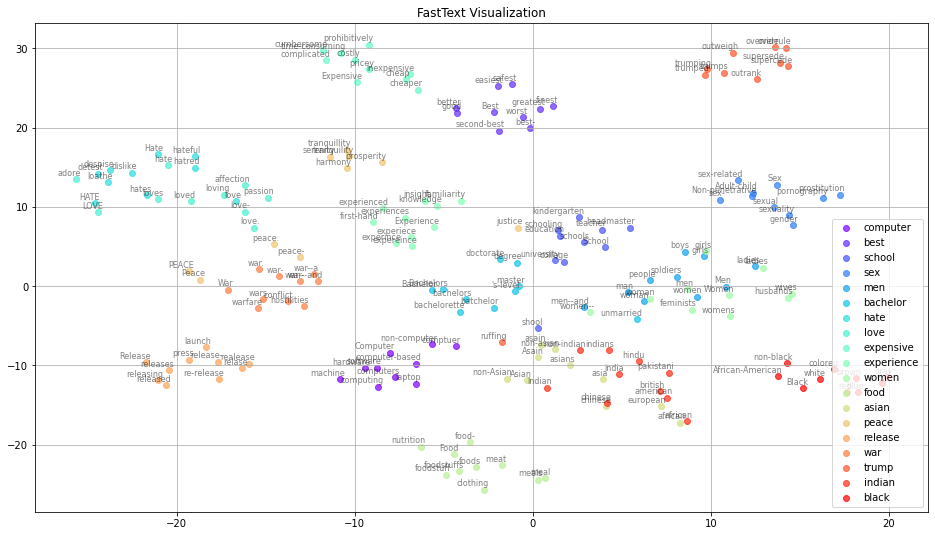

In [82]:
keys = ['computer', 'best', 'school', 'sex', 'men', 'bachelor', 'hate', 'love', 'expensive',
        'experience', 'women', 'food', 'asian', 'peace', 'release', 'war', 'trump', 'indian', 'black']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in fasttext_model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(fasttext_model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('FastText Visualization', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

# Topic Modeling

In [0]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


##Finding Insincere Question Topics using LDA

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [50]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=2000, stop_words='english')

tf = tf_vectorizer.fit_transform(insincere_alphas_text)

lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', random_state=2018)
lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words=10)

Topic #0: people white indian black really good make christians pakistan come
Topic #1: indians hate people muslim countries right government does north support
Topic #2: think people true gay americans america bad person guys real
Topic #3: chinese people obama racist islam usa world states conservatives live
Topic #4: muslims india like country modi old man does realize year
Topic #5: believe jews god woman children better israel girl war people
Topic #6: sex liberals feel hindus does want having don think state
Topic #7: quora girls people just questions like china ca know stupid
Topic #8: trump did does president say donald stop kill like money
Topic #9: women men democrats like way think just wrong question best



In [51]:
np.random.seed(7)
cv = CountVectorizer(min_df=10,
           max_features = 100000,
           analyzer = "word",
           ngram_range = (1, 2),
           stop_words = "english")       
           
count_vectors = cv.fit_transform(insincere_alphas_text)

n_topics = 8
lda_model = LatentDirichletAllocation(n_components = n_topics,
                    learning_method = "online",
                    max_iter = 20,
                    random_state = 7,
                    n_jobs = -1)
lda_model.fit(count_vectors)

cv_feature_names = cv.get_feature_names()
print_top_words(lda_model, cv_feature_names, n_top_words=10)

Topic #0: muslims indian feel india christians children girl does hindus christian
Topic #1: like people girls country does gay obama think just america
Topic #2: people white world americans believe good does pakistan racist white people
Topic #3: black sex people muslim democrats china woman chinese did better
Topic #4: women men trump donald donald trump like old does indian year
Topic #5: trump quora does president questions liberals ca people want did
Topic #6: did india people hillary state care clinton jewish child hindu
Topic #7: indians people hate true jews god like israel states stop



The count_vectors is $80810\times10228$ matrix, where 80810 is the number of insincere training questions. \
cv_feature_names contains the name of those 10228 words.\
lda_model.components_ is a `num of topics`$\times$`num of words` matrix, the elements are probability distribution. 

In [52]:
print_top_words(lda_model, cv_feature_names, n_top_words=5)

Topic #0: muslims indian feel india christians
Topic #1: like people girls country does
Topic #2: people white world americans believe
Topic #3: black sex people muslim democrats
Topic #4: women men trump donald donald trump
Topic #5: trump quora does president questions
Topic #6: did india people hillary state
Topic #7: indians people hate true jews



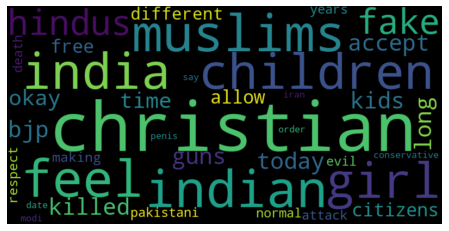

In [55]:
n_top_words = 40
message = " ".join([cv_feature_names[i] for i in lda_model.components_[0,:].argsort()[:-n_top_words - 1:-1]])

wordcloud = WordCloud(background_color='black', width=800, height=400, stopwords = set(STOPWORDS))
wordcloud.generate(message)

# Display the generated image:
plt.figure(figsize=(8.0, 4.0))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

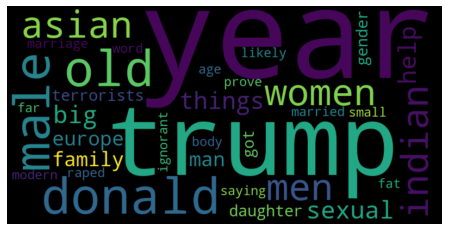

In [56]:
n_top_words = 40
message = " ".join([cv_feature_names[i] for i in lda_model.components_[4,:].argsort()[:-n_top_words - 1:-1]])

wordcloud = WordCloud(background_color='black', width=800, height=400, stopwords = set(STOPWORDS))
wordcloud.generate(message)

# Display the generated image:
plt.figure(figsize=(8.0, 4.0))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
tf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=2000, stop_words='english')

tf = tf_vectorizer.fit_transform(insincere_alphas_text)

lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', random_state=2018)
lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words=10)

Topic #0: black people india white indians racist pakistan indian feel really
Topic #1: quora hate questions people liberals look does modi indians big
Topic #2: gay americans think bad america good china people rape person
Topic #3: muslims muslim christians islam true usa atheists world people religion
Topic #4: women men woman man like old year say want need
Topic #5: girl children women asian stupid earth fuck iq men bjp
Topic #6: sex chinese hindus better israel muslims war mom having penis
Topic #7: girls guys use jews people british supporters like boys considered
Topic #8: trump did donald president obama stop does kill hillary believe
Topic #9: time eat best make new democrats way child chinese american



##Finding Insincere Question Topics using NMF

In [58]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=10, random_state=0, alpha=0.1)
nmf.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(nmf, tf_feature_names, n_top_words=10)

Topic #0: people black white think hate chinese racist believe americans gay
Topic #1: women men white black indian asian think man muslim feminists
Topic #2: trump donald president supporters liberals think obama democrats hillary america
Topic #3: muslims india hate indians hindus indian muslim pakistan world christians
Topic #4: girls indian guys boys love white girl hindu chinese asian
Topic #5: quora questions indians stupid answers ask answer question think just
Topic #6: sex mom sister want mother having gay son old girl
Topic #7: does make mean gay feel want world god know china
Topic #8: did obama americans jews kill know god castrate hitler just
Topic #9: like look americans just chinese feel act guys liberals countries

